In [6]:
from PIL import Image
import math
import collections

In [19]:
def draw_circle(xc, yc, r, h=320, w=240, alias=False, fill=False):
    
    d = 5/4 - r
    x = 0
    y = r
    points = [[x, y], [y, x]]
    
    # generate first quarter
    while x < y:
        if d < 0:
            d += 2 * x + 3
        elif d > 0:
            y -= 1
            d += 2 * x - 2 * y - 5
        
        x = x + 1
        points.append([x, y])
        points.append([y, x])
    
    points.append([int(r / math.sqrt(2)), int(r / math.sqrt(2))])
    
        
    # check if all y have been drawn
    spoints = set([x[1] for x in points])
    for y in range(0, r + 1):
        if y not in spoints:
            print(y)
    
    # generate rest quarters
    rest = []
    for xq, yq in points:
        rest.append([xq, -yq])
        rest.append([-xq, yq])
        rest.append([-xq, -yq])
    
    points += rest

    # draw the border and alias
    img = Image.new('RGB', (w, h))
    pixels = img.load()
    r2 = r ** 2
    for x, y in points:
        if alias:
            
            subc = [[x, y], [x + 1/3, y], [x + 2/3, y],
                    [x, y + 1/3], [x + 1/3, y + 1/3], [x + 2/3, y + 1/3],
                    [x, y + 2/3], [x + 1/3, y + 2/3], [x + 2/3, y + 2/3]
                   ]
            # find subarea inside the circle
            total = 0
            for sx, sy in subc:
                if sx ** 2 + sy ** 2 < r2:
                    total += 1
            # calculate the value
            pixels[x + xc, y + yc] = (int(255 * total / 9), 0, 0)
            
        else:
            pixels[x + xc, y + yc] = (255, 0, 0)
    
    if not fill:
        return img
    
    # fill the area
    # scan line
    ydict = collections.defaultdict(set)
    for x, y in points:
        ydict[y + yc].add(x + xc)
    # fill
    for cy, xset in ydict.items():
        xmin = min(xset)
        xmax = max(xset)
        for cx in range(xmin, xmax + 1):
            if cx in xset:
                continue
            pixels[cx, cy] = (255, 0, 0)
    
    return img

In [20]:
img1 = draw_circle(120, 160, 100)
img1.save('circle_1.jpg')

img2 = draw_circle(120, 160, 100, fill=True)
img2.save('circle_2.jpg')

img3 = draw_circle(120, 160, 100, alias=True, fill=True)
img3.save('circle_3.jpg')

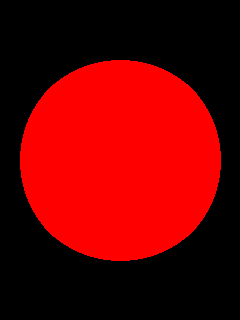

In [15]:
img2 = draw_circle(120, 160, 100, alias=False, fill=True)
img2.show()

In [5]:
pixels = img2.load()
seed_fill(120, 160, pixels)
img2.save('circle_2.jpg')
img2.show()

KeyboardInterrupt: 